In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
# 在jupyter notebook中显示图片
%matplotlib inline
# 设置内部图片格式
%config InlineBackend.figure_format = "png"
# 全局设置字体
matplotlib.rcParams["font.sans-serif"] = ["DejaVu Sans"]
# 全局设置字体大小
matplotlib.rcParams["font.size"] = 14

### 基本要素

在开始画图之前我们先看一下`matplotlib`画图的基本要素，我们结合官方给出的两张图来看

<table><tr>
<td><img src="./data/figure.png" width=360 height=360></td>
<td><img src="./data/grid.png" width=360 height=360> </td>
</tr></table>

我们对上面两张图分别解释matplotlib中的一些概念

- `Figure`: 可以理解为画布，在画图之前首先必须先创建一个画布，然后再在这个画布上画图，在一个画布上可以画多个图
- `Axes`: 可以理解为画布上的一个图，通过`subplot`在画布上可以画多个图，一个图对应一个`Axes`
- `Axis`: 坐标轴
- `title`: 该图对应的标题
- `xy label`: 水平轴和垂直轴代表的意义
- `Grid`: 右图中的虚线网格，可显示也可不显示
- `Legend`: 图例，标识不同图形
- `Markers`: 表示点的形状

下面我们介绍最常用的一些画图函数

In [2]:
# 将要绘制的数据
a = np.linspace(-3, 3, 50)
b = np.sin(a) * 10
c = a ** 3
d = np.exp(a)

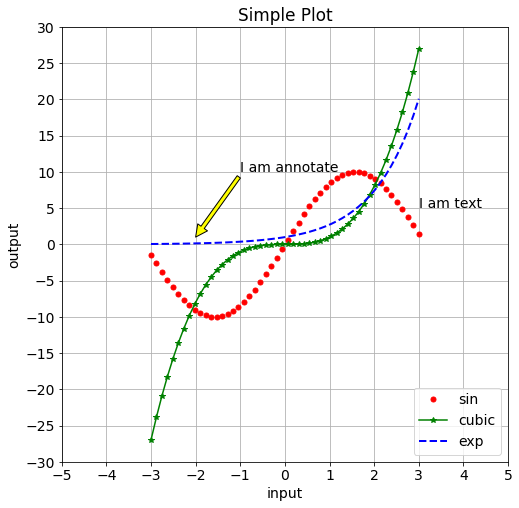

In [3]:
# 1. 使用Axes风格绘图

# subplots返回Figure和Axes，然后我们可以使用返回的Axes进行画图，可以通过figsize指定Figure大小
fig, ax = plt.subplots(figsize=(8, 8))

# 使用plot绘制，其中"o*"表示点的形状即Markers，各种markers表示可以参考(https://matplotlib.org/api/markers_api.html#module-matplotlib.markers)
# 通过markersize指定marker大小，通过label指定每条曲线对应的名字，通过color参数指定绘制颜色
# 通过linestyle和linewidth可以设置曲线的样式和宽度
ax.plot(a, b, "o", markersize=5, label="sin", color="red")
ax.plot(a, c, "*", linestyle="-", label="cubic", color="green")
ax.plot(a, d, linewidth=2, linestyle="--", label="exp", color="blue")

# 设置x轴和y轴表示的意义
ax.set_xlabel("input")
ax.set_ylabel("output")

# 设置x轴和y轴的坐标范围
ax.set_xlim((-5, 5))
ax.set_ylim((-30, 30))

# 设置x轴和y轴的刻度
ax.set_xticks([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
ax.set_yticks([-30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30])

# 设置该图的标题
ax.set_title("Simple Plot")

# 在给定坐标处添加文本，第一个参数为x轴坐标，第二个参数为y轴坐标，第三个参数为要添加的文本
ax.text(3, 5, "I am text")

# 添加标注文本，第一个参数是要添加的标注文本，xy参数指定箭头的坐标，xytext指定标注文本的坐标，arrowprops设置箭头属性，这里设置了箭头的颜色
ax.annotate("I am annotate", xy=(-2, 1), xytext=(-1, 10), arrowprops=dict(facecolor="yellow"))

# 是否显示网格，默认不显示
ax.grid(True)

# 绘制图例，loc参数指定显示位置
# ax.legend(loc="upper left")
# ax.legend(loc="upper right")
# ax.legend(loc="lower left")
ax.legend(loc="lower right")

plt.show()

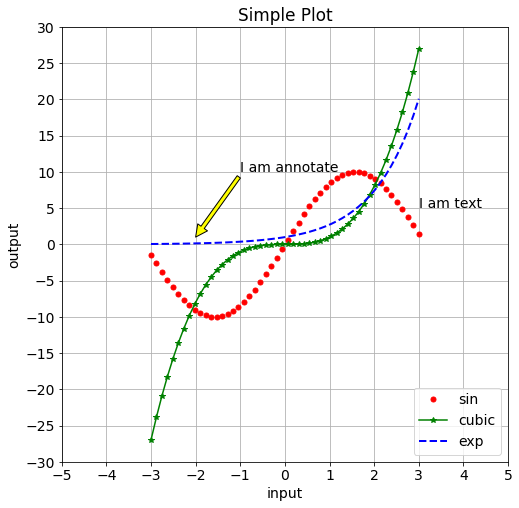

In [4]:
# 2. 使用pyplt风格绘图

# 除了使用Axes绘图外还可以直接使用pyplt绘图，与上面Axes风格绘图代码功能等价的pyplt风格绘图代码如下

plt.figure(figsize=(8, 8))

plt.plot(a, b, "o", markersize=5, label="sin", color="red")
plt.plot(a, c, "*", linestyle="-", label="cubic", color="green")
plt.plot(a, d, linewidth=2, linestyle="--", label="exp", color="blue")

plt.xlabel("input")
plt.ylabel("output")

plt.xlim((-5, 5))
plt.ylim((-30, 30))

plt.xticks([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
plt.yticks([-30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30])

plt.title("Simple Plot")

plt.text(3, 5, "I am text")

plt.annotate("I am annotate", xy=(-2, 1), xytext=(-1, 10), arrowprops=dict(facecolor="yellow"))

plt.grid(True)

# plt.legend(loc="upper left")
# plt.legend(loc="upper right")
# plt.legend(loc="lower left")
plt.legend(loc="lower right")

plt.show()

我们既可以使用`Axes`风格也可以使用`pyplt`风格绘图，使用哪种风格看个人喜好，我个人认为`Axes`风格更优雅

上面我们介绍的是在一个`Figure`上画一个图，下面我们看一下如何在一个`Figure`上画多个图

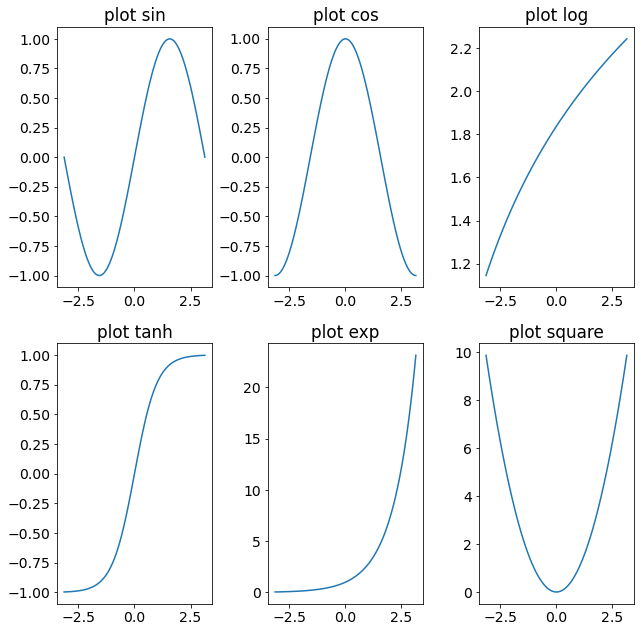

In [5]:
x = np.linspace(-np.pi, np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.log(x+2*np.pi)
y4 = np.tanh(x)
y5 = np.exp(x)
y6 = x ** 2

# subplots前两个参数分别指定子图行数和列数，例如下面代码是要绘制2行3列6个子图，以元组的形式返回Axes，不指定行数和列数默认返回一个Axes
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(9, 9))

# 分别绘制各个子图，绘制方法与前文所讲相同

ax1.plot(x, y1)
ax1.set_title("plot sin")

ax2.plot(x, y2)
ax2.set_title("plot cos")

ax3.plot(x, y3)
ax3.set_title("plot log")

ax4.plot(x, y4)
ax4.set_title("plot tanh")

ax5.plot(x, y5)
ax5.set_title("plot exp")

ax6.plot(x, y6)
ax6.set_title("plot square")

# 调整子图布局
plt.tight_layout()

plt.show()

有时候我们需要直接显示本地图片，通过`imshow`即可显示本地图片

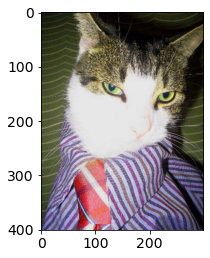

In [6]:
from PIL import Image

# 读取图片
img = Image.open("./data/test.jpg")

fig, ax = plt.subplots()

# 显示图片
ax.imshow(img)

plt.show()

下面我们看一些常见的绘图案例

#### 柱状图

In [7]:
# 伪造数据
ages = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
python = [9000, 9500, 10000, 11000, 13000, 17000, 20000, 23000, 25000, 27000, 30000]
cpp = [8000, 9000, 9500, 10000, 12000, 16000, 19000, 22000, 26000, 29000, 35000]
golang = [10000, 10500, 12000, 13000, 15000, 18500, 22500, 25000, 27500, 28500, 31000]

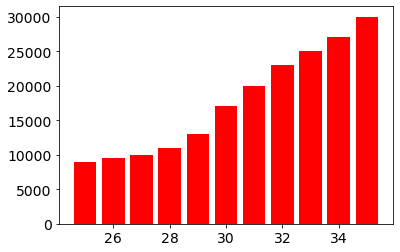

In [8]:
# 绘制柱状图
plt.bar(ages, python, color="red", label="Python")
plt.show()

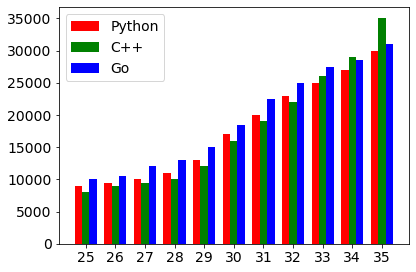

In [9]:
# 绘制多组数据

idx = np.arange(len(ages))
# 如何设置bar_width与绘制多少组数据相关
bar_width = 0.25

plt.bar(idx-bar_width, python, width=bar_width, color="red", label="Python")
plt.bar(idx, cpp, width=bar_width, color="green", label="C++")
plt.bar(idx+bar_width, golang, width=bar_width, color="blue", label="Go")

plt.xticks(ticks=idx, labels=ages)

plt.legend()

plt.tight_layout()
plt.show()

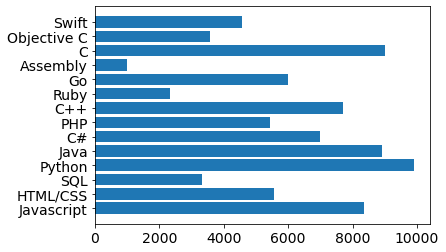

In [10]:
# 绘制水平方向柱状图

# 伪造数据
language = ["Javascript", "HTML/CSS", "SQL", "Python", "Java", "C#", "PHP", "C++", "Ruby", "Go", "Assembly", "C", "Objective C", "Swift"]
factor = [8351, 5566, 3321, 9898, 8900, 7000, 5432, 7700, 2345, 5990, 980, 9000, 3579, 4567]
# 绘制水平柱状图
plt.barh(language, factor)
plt.show()

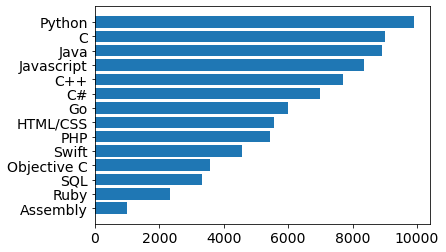

In [11]:
# 排序后再绘制
data = list(zip(language, factor))
data.sort(key=lambda x: x[1])
language, factor = zip(*data)
plt.barh(language, factor)
plt.show()

#### 饼图

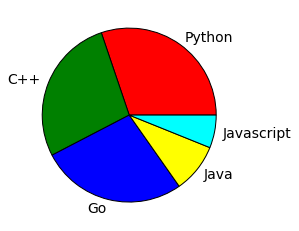

In [12]:
# 伪造数据
language = ["Python", "C++", "Go", "Java", "Javascript"]
values = [9898, 8989, 8888, 3000, 2000]
color = ["red", "green", "blue", "yellow", "cyan"]

# 绘制饼图
plt.pie(values, labels=language, colors=color, wedgeprops={"edgecolor": "black"})
plt.show()

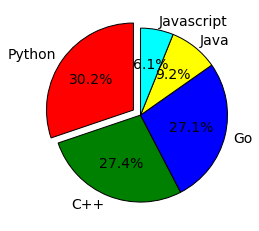

In [13]:
# 还可以突出显示某一部分，哪个数值非0，哪部分将凸出
explode = [0.1, 0, 0, 0, 0]

# 设置参数autopct将自动计算百分比
# 参数startangle控制显示角度
plt.pie(values, labels=language, explode=explode, autopct="%1.1f%%", startangle=90, colors=color, wedgeprops={"edgecolor": "black"})
plt.show()

#### 散点图

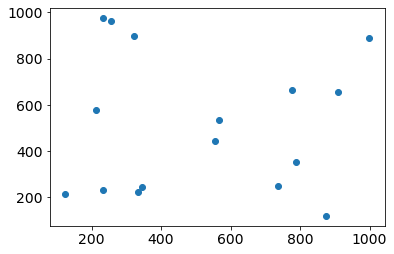

In [14]:
# 伪造数据
x1 = [123, 234, 345, 567, 789, 910, 212, 232, 323, 256, 735, 873, 333, 555, 777, 999]
x2 = [213, 231, 243, 534, 355, 654, 578, 975, 899, 963, 251, 120, 222, 444, 666, 888]

# 绘制散点图，不指定颜色和大小则所有点颜色和大小都相同
plt.scatter(x1, x2)
plt.show()

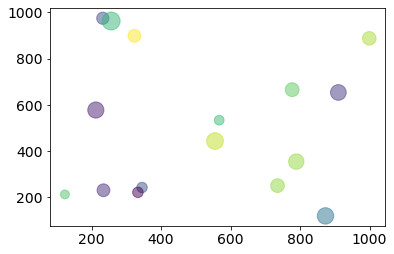

In [15]:
from numpy.random import default_rng
rng = default_rng()

# 每个点颜色随机
colors = rng.random(len(x1))
# 每个点大小随机
area = rng.random(len(x1)) * 300 + 50

# 参数s指定每个点的大小
# 参数c指定每个点的颜色
# alpha指定点的不透明度
plt.scatter(x1, x2, s=area, c=colors, alpha=0.5)
plt.show()

#### 直方图

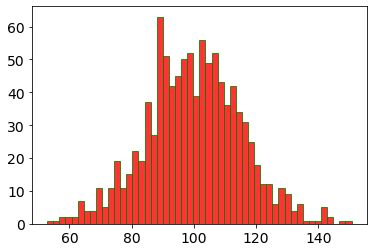

In [16]:
# 伪造数据
mu = 100
sigma = 15
x = rng.normal(mu, sigma, size=1000)

# 绘制直方图
plt.hist(x, bins=50, facecolor="red", edgecolor="green", alpha=0.8)
plt.show()

#### 绘制时序数据

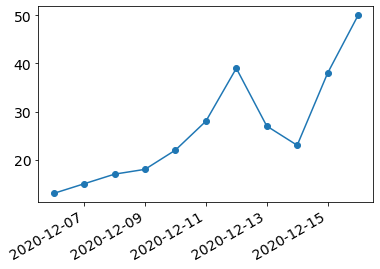

In [17]:
from datetime import datetime

# 伪造数据
dates = [
    datetime(2020, 12, 6),
    datetime(2020, 12, 7),
    datetime(2020, 12, 8),
    datetime(2020, 12, 9),
    datetime(2020, 12, 10),
    datetime(2020, 12, 11),
    datetime(2020, 12, 12),
    datetime(2020, 12, 13),
    datetime(2020, 12, 14),
    datetime(2020, 12, 15),
    datetime(2020, 12, 16)
]

values = [13, 15, 17, 18, 22, 28, 39, 27, 23, 38, 50]

# 绘制时序数据
plt.plot_date(dates, values, linestyle="solid")
plt.gcf().autofmt_xdate()
plt.show()

学习和使用`matplotlib`的一点建议

`matplotlib`官网有非常多的`example`，你不知道怎么画图时就去官网找`example`然后修改官网的代码，但是前提是你要理解本文最开头所说的画图基本要素